# Graduation Rates among postsecondary education students in the U.S:

We are interested in learning about what exactly affects an undergraduate student’s likelihood to complete college. Particularly, we are observing a student’s financial aid, received to discover whether or not these variables have a significant impact on graduation rates. The goal is to use our data analysis skills to determine the extent that these factors affect the percentage of students who graduate within 100% of normal time for that specific institution.

For this machine learning model, use Linear Regression as a baseline, and test the training data against the x variables.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

plt.figure().set_figwidth(50)

<Figure size 5000x480 with 0 Axes>

In [3]:
data_1 = pd.read_csv("cc_institution_details.csv")

data_1.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [4]:
data_1.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

In [5]:
data_1.shape

(3798, 63)

In [6]:
data_2 = pd.read_csv("cc_institution_grads.csv")

In [7]:
data_2.head()

,index,unitid,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,0,100760,2011,B,X,2y all,446.0,73.0,105.0,16.4,23.5
1,1,100760,2011,M,X,2y all,185.0,NaN,40.0,NaN,21.6
2,2,100760,2011,F,X,2y all,261.0,NaN,65.0,NaN,24.9
3,3,100760,2011,B,W,2y all,348.0,NaN,86.0,NaN,24.7
4,4,100760,2011,M,W,2y all,162.0,NaN,35.0,NaN,21.6


In [8]:
data_2.shape

(1302102, 11)

In [9]:
# Select the needed column which are gender and race column
columns = ['unitid', 'gender', 'race']
data_2 = data_2[columns]

data_2

,unitid,gender,race
0,100760,B,X
1,100760,M,X
2,100760,F,X
3,100760,B,W
4,100760,M,W
...,...,...,...
1302097,168591,F,Ai
1302098,168740,F,Ai
1302099,169716,F,Ai
1302100,170082,F,Ai


Now, let's drop anywhere gender equals "B" and race equals "X". 

In [10]:
# Search where gender = 'B' or race = 'X'
gender_race = data_2[(data_2['gender'] == 'B') | (data_2['race'] == 'X')]
gender_race.shape

(578712, 3)

There are 578,712 occurence where gender appears as both Female and Male due to error in data entry and where race appears as all race, X.

In [11]:
# Drop where 143094 occurences
data_2 = data_2.drop(gender_race.index)

In [12]:
# Check the shape of data_2
data_2.shape

(723390, 3)

In [13]:
# Confirm if all the occurence where gender = B is gone and where race = X is no more in the dataset

# Query the dataframe where gender equals B
data_2[data_2['gender'] == 'B'].count()

unitid    0
gender    0
race      0
dtype: int64

In [14]:
# Query the dataframe where race equals X
data_2[data_2['race'] == 'X'].count()

unitid    0
gender    0
race      0
dtype: int64

We have confirmed that no existence where gender appears to be both and race appears to be all in the dataset. We can now proceed to combining the datasets.

### Combine the Dataset

In [15]:
# Combining the two dataframe (data_1 and data_2)

# Taking the intersection of the two dataframes

df = data_1.merge(data_2, on = 'unitid', how = 'inner')

In [16]:
# Display the first 5 rows of the dataset
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size,gender,race
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0,M,W
1,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0,F,W
2,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0,M,B
3,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0,F,B
4,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0,M,H


Now, we need to decide what columns you want to exclude...

For example I dont think city or state will have an effect on the graduation rate. So we could exclude city, state, long and lat. 
Essentially anything related to location 

Columns we want to consider: school type, gender, race, funding, Cohort size or student count e.t.c. So we will drop unnecessary columns.

In [17]:
df = df[[
        'index', 
        'level', 
        'control',
         'gender', 
         'race',
        'student_count',
        'awards_per_value', 
        'awards_per_state_value', 
        'awards_per_natl_value',
        'exp_award_value', 
        'exp_award_state_value', 
        'exp_award_natl_value',
        'exp_award_percentile',  
        'aid_value', 
        'aid_percentile',
        'med_sat_value',
        'grad_100_value',
        'grad_100_percentile', 
        'grad_150_value', 
        'grad_150_percentile',
        'pell_value', 
        'pell_percentile', 
        'retain_value', 
        'retain_percentile',
        'cohort_size']]

In [18]:
df.head()

,index,level,control,gender,race,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,...,med_sat_value,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size
0,0,4-year,Public,M,W,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
1,0,4-year,Public,F,W,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
2,0,4-year,Public,M,B,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
3,0,4-year,Public,F,B,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
4,0,4-year,Public,M,H,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699720 entries, 0 to 699719
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   699720 non-null  int64  
 1   level                   699720 non-null  object 
 2   control                 699720 non-null  object 
 3   gender                  699720 non-null  object 
 4   race                    699720 non-null  object 
 5   student_count           699720 non-null  int64  
 6   awards_per_value        699720 non-null  float64
 7   awards_per_state_value  699720 non-null  float64
 8   awards_per_natl_value   699720 non-null  float64
 9   exp_award_value         699720 non-null  int64  
 10  exp_award_state_value   699720 non-null  int64  
 11  exp_award_natl_value    699720 non-null  int64  
 12  exp_award_percentile    699720 non-null  int64  
 13  aid_value               699600 non-null  float64
 14  aid_percentile      

In [20]:
#Getting the total number of nan values
df.isnull().sum(axis = 0)


index                          0
level                          0
control                        0
gender                         0
race                           0
student_count                  0
awards_per_value               0
awards_per_state_value         0
awards_per_natl_value          0
exp_award_value                0
exp_award_state_value          0
exp_award_natl_value           0
exp_award_percentile           0
aid_value                    120
aid_percentile               120
med_sat_value             384000
grad_100_value             55020
grad_100_percentile        55020
grad_150_value             55020
grad_150_percentile        55020
pell_value                   120
pell_percentile              120
retain_value               50820
retain_percentile          50820
cohort_size                55020
dtype: int64

From the information above, med_sat_value has alot of missing values. To avoid introducing bias in our model, it is best to drop this column.

In [21]:
df.head()

,index,level,control,gender,race,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,...,med_sat_value,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size
0,0,4-year,Public,M,W,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
1,0,4-year,Public,F,W,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
2,0,4-year,Public,M,B,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
3,0,4-year,Public,F,B,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
4,0,4-year,Public,M,H,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0


In [22]:
# Determine the number of unique values in each column.
df.nunique()

index                     3798
level                        2
control                      3
gender                       2
race                         5
student_count             2829
awards_per_value           517
awards_per_state_value     160
awards_per_natl_value        6
exp_award_value           3611
exp_award_state_value      264
exp_award_natl_value         6
exp_award_percentile       101
aid_value                 3135
aid_percentile             101
med_sat_value              472
grad_100_value             806
grad_100_percentile        101
grad_150_value             862
grad_150_percentile        101
pell_value                 832
pell_percentile            101
retain_value               649
retain_percentile          101
cohort_size               1409
dtype: int64

In [23]:
# student_count = Total number of undergraduates in 2010
# cohort_size = 
df[['student_count', 'cohort_size']]  ## what is the difference between these 2 columns? 

,student_count,cohort_size
0,4051,882.0
1,4051,882.0
2,4051,882.0
3,4051,882.0
4,4051,882.0
...,...,...
699715,144,23.0
699716,144,23.0
699717,144,23.0
699718,144,23.0


cohort_size column may represent the size of a specific group of individuals who share a common characteristic within the larger population of student_count.

So, from the data, we can see that cohort_size is just a subset of data from the student_count. 

In [24]:
df.level.unique()

array(['4-year', '2-year'], dtype=object)

In [25]:
df.control.unique()

array(['Public', 'Private not-for-profit', 'Private for-profit'],
      dtype=object)

In [26]:
# percentage of missing values
(df.isnull().sum() / df.shape[0])*100

index                      0.000000
level                      0.000000
control                    0.000000
gender                     0.000000
race                       0.000000
student_count              0.000000
awards_per_value           0.000000
awards_per_state_value     0.000000
awards_per_natl_value      0.000000
exp_award_value            0.000000
exp_award_state_value      0.000000
exp_award_natl_value       0.000000
exp_award_percentile       0.000000
aid_value                  0.017150
aid_percentile             0.017150
med_sat_value             54.879094
grad_100_value             7.863145
grad_100_percentile        7.863145
grad_150_value             7.863145
grad_150_percentile        7.863145
pell_value                 0.017150
pell_percentile            0.017150
retain_value               7.262905
retain_percentile          7.262905
cohort_size                7.863145
dtype: float64

There are approximately 55% of missing values for the label med_sat_value. We will drop this column as it may introduce bias to our model. 

### Data Cleaning

In [27]:
df.shape

(699720, 25)

In [28]:
# Drop the med_sat_value columns
df.drop('med_sat_value', axis = 1, inplace = True)

In [29]:
# Check for all duplicate rows

df.duplicated().sum()

661740

In [30]:
# Display maximum column width
pd.set_option('max_colwidth', None)

# Check the data of the duplicated rows
df[df.duplicated(keep=False)]

,index,level,control,gender,race,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,...,aid_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size
0,0,4-year,Public,M,W,4051,14.2,18.8,21.5,105331,...,72.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
1,0,4-year,Public,F,W,4051,14.2,18.8,21.5,105331,...,72.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
2,0,4-year,Public,M,B,4051,14.2,18.8,21.5,105331,...,72.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
3,0,4-year,Public,F,B,4051,14.2,18.8,21.5,105331,...,72.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
4,0,4-year,Public,M,H,4051,14.2,18.8,21.5,105331,...,72.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699715,3797,4-year,Private for-profit,F,H,144,22.1,19.6,24.6,48074,...,82.0,34.8,78.0,47.8,85.0,86.5,97.0,NaN,NaN,23.0
699716,3797,4-year,Private for-profit,M,Ai,144,22.1,19.6,24.6,48074,...,82.0,34.8,78.0,47.8,85.0,86.5,97.0,NaN,NaN,23.0
699717,3797,4-year,Private for-profit,F,Ai,144,22.1,19.6,24.6,48074,...,82.0,34.8,78.0,47.8,85.0,86.5,97.0,NaN,NaN,23.0
699718,3797,4-year,Private for-profit,M,A,144,22.1,19.6,24.6,48074,...,82.0,34.8,78.0,47.8,85.0,86.5,97.0,NaN,NaN,23.0


From the gender and race ccolumn, we can see that the duplicates are not just duplicate rows. So, there is no need of dropping these rows.

In [31]:
# Drop all duplicated rows
#df.drop_duplicates(inplace = True)

In [32]:
# Drop all empty or null values

df.dropna(inplace = True)

In [33]:
df.shape

(626100, 24)

In [34]:
# Check if the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626100 entries, 0 to 699659
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   626100 non-null  int64  
 1   level                   626100 non-null  object 
 2   control                 626100 non-null  object 
 3   gender                  626100 non-null  object 
 4   race                    626100 non-null  object 
 5   student_count           626100 non-null  int64  
 6   awards_per_value        626100 non-null  float64
 7   awards_per_state_value  626100 non-null  float64
 8   awards_per_natl_value   626100 non-null  float64
 9   exp_award_value         626100 non-null  int64  
 10  exp_award_state_value   626100 non-null  int64  
 11  exp_award_natl_value    626100 non-null  int64  
 12  exp_award_percentile    626100 non-null  int64  
 13  aid_value               626100 non-null  float64
 14  aid_percentile      

In [35]:
# Check for correlation of the numerical values

df.corr()

,index,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,aid_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size
index,1.000000,-0.125301,0.112187,0.203304,0.266270,-0.003547,-0.186661,-0.181641,-0.004638,-0.128725,-0.055005,-0.012167,-0.044371,-0.022242,-0.055282,0.193277,0.017757,-0.131909,-0.098433,-0.130488
student_count,-0.125301,1.000000,-0.118447,-0.215786,-0.259059,-0.047241,-0.085655,-0.118783,-0.002309,-0.127537,0.047817,-0.092085,0.055988,-0.003440,0.109960,-0.220258,-0.157741,0.136378,0.210041,0.752227
awards_per_value,0.112187,-0.118447,1.000000,0.548278,0.475893,-0.179945,-0.156890,-0.138341,-0.274116,-0.022715,0.023594,0.272926,0.180413,0.302768,0.183195,0.126161,-0.048369,0.115423,0.115663,-0.062209
awards_per_state_value,0.203304,-0.215786,0.548278,1.000000,0.807619,-0.033986,-0.180066,-0.144180,-0.054812,-0.003323,0.016147,0.240275,0.020327,0.326454,0.060409,0.285107,-0.014392,0.079382,0.036576,-0.135389
awards_per_natl_value,0.266270,-0.259059,0.475893,0.807619,1.000000,-0.008116,-0.081486,-0.101330,0.015631,0.033255,0.004981,0.262787,-0.054250,0.363867,-0.002059,0.354491,-0.017186,0.079096,-0.008297,-0.177922
exp_award_value,-0.003547,-0.047241,-0.179945,-0.033986,-0.008116,1.000000,0.213485,0.198359,0.352340,0.237177,0.079439,0.103685,0.017807,0.064512,0.012964,-0.118145,-0.085965,0.110522,0.063599,-0.013130
exp_award_state_value,-0.186661,-0.085655,-0.156890,-0.180066,-0.081486,0.213485,1.000000,0.772126,0.131225,0.622805,0.120744,0.356695,0.086124,0.334264,0.068604,-0.337259,-0.070890,0.375781,0.114033,-0.012603
exp_award_natl_value,-0.181641,-0.118783,-0.138341,-0.144180,-0.101330,0.198359,0.772126,1.000000,-0.022417,0.676396,0.020759,0.377207,0.025714,0.359983,0.000007,-0.356850,0.010105,0.396343,0.030178,-0.070268
exp_award_percentile,-0.004638,-0.002309,-0.274116,-0.054812,0.015631,0.352340,0.131225,-0.022417,1.000000,0.237948,0.281536,0.123876,0.093760,0.073227,0.088063,-0.108139,-0.197053,0.074270,0.132164,0.104920
aid_value,-0.128725,-0.127537,-0.022715,-0.003323,0.033255,0.237177,0.622805,0.676396,0.237948,1.000000,0.554061,0.625545,0.331416,0.557610,0.309327,-0.412352,-0.241235,0.480501,0.288057,-0.013128


Cohort size has a very low correlation (less than 10%) with grad_100_value while student_count is negatively correlated with grad_100_value. We can check how each affect the grad_100_value.

In [36]:
# Drop column for index

df.drop('index', axis = 1, inplace  = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626100 entries, 0 to 699659
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   level                   626100 non-null  object 
 1   control                 626100 non-null  object 
 2   gender                  626100 non-null  object 
 3   race                    626100 non-null  object 
 4   student_count           626100 non-null  int64  
 5   awards_per_value        626100 non-null  float64
 6   awards_per_state_value  626100 non-null  float64
 7   awards_per_natl_value   626100 non-null  float64
 8   exp_award_value         626100 non-null  int64  
 9   exp_award_state_value   626100 non-null  int64  
 10  exp_award_natl_value    626100 non-null  int64  
 11  exp_award_percentile    626100 non-null  int64  
 12  aid_value               626100 non-null  float64
 13  aid_percentile          626100 non-null  float64
 14  grad_100_value      

Our data is now clean and free from null values.

In [38]:
# Reset the index 

df = df.reset_index(drop = True)

# Take a random sample of 10 rows
df.sample(10)

,level,control,gender,race,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,aid_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size
491648,4-year,Private not-for-profit,F,H,1329,20.7,23.3,22.5,116075,84271,...,87.0,31.2,31.0,51.5,43.0,39.9,57.0,70.1,35.0,365.0
55417,4-year,Public,F,H,27099,25.6,25.0,21.5,47319,79310,...,92.0,32.7,73.0,66.2,83.0,39.6,55.0,87.8,90.0,4506.0
171550,2-year,Public,F,H,6929,20.1,18.5,16.5,14081,16639,...,93.0,11.9,61.0,23.4,61.0,49.0,68.0,53.3,31.0,1045.0
95815,4-year,Private not-for-profit,M,H,2729,20.2,24.2,22.5,95137,71929,...,92.0,56.4,72.0,64.1,68.0,36.5,48.0,78.1,58.0,557.0
469963,2-year,Private for-profit,F,W,212,75.0,37.8,32.8,11756,20075,...,8.0,62.2,77.0,62.2,53.0,81.5,77.0,75.6,72.0,156.0
624098,2-year,Private for-profit,F,H,265,36.5,28.4,32.8,23835,18728,...,87.0,26.5,31.0,26.5,7.0,29.3,3.0,64.5,41.0,34.0
47486,2-year,Public,F,Ai,10205,11.3,12.8,16.5,66933,44144,...,30.0,4.1,16.0,15.5,30.0,47.3,64.0,73.7,95.0,1229.0
52976,4-year,Private not-for-profit,M,H,1081,25.1,22.4,22.5,206748,125902,...,97.0,73.0,88.0,82.1,91.0,16.1,8.0,90.8,89.0,252.0
379543,4-year,Public,F,W,2012,10.8,19.5,21.5,73436,74213,...,23.0,9.6,14.0,17.6,3.0,50.3,83.0,51.3,3.0,136.0
44395,4-year,Private not-for-profit,F,H,2105,14.1,22.4,22.5,113971,125902,...,88.0,29.7,28.0,58.9,58.0,48.2,73.0,76.2,53.0,192.0


In [39]:
# Check for the datatypes
df.dtypes

level                      object
control                    object
gender                     object
race                       object
student_count               int64
awards_per_value          float64
awards_per_state_value    float64
awards_per_natl_value     float64
exp_award_value             int64
exp_award_state_value       int64
exp_award_natl_value        int64
exp_award_percentile        int64
aid_value                 float64
aid_percentile            float64
grad_100_value            float64
grad_100_percentile       float64
grad_150_value            float64
grad_150_percentile       float64
pell_value                float64
pell_percentile           float64
retain_value              float64
retain_percentile         float64
cohort_size               float64
dtype: object

### Data Preprocessing

In [40]:
# Creating dummy variables for the categorical variables
# dont do drop_first = True here 
# for control we have 3 different types so it drops the first one
# drop_first = True is good for things that are one or the other like yes/no, male/female, pass/fail 
# we could use it for the 2-year / 4-year if you wanted but i think it is okay to keep for now 

train_features = df
train_features = pd.get_dummies(train_features, drop_first = False)

train_features.sample(5)

,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,aid_percentile,...,control_Private for-profit,control_Private not-for-profit,control_Public,gender_F,gender_M,race_A,race_Ai,race_B,race_H,race_W
129927,103,39.8,26.8,25.9,66385,74074,34510,79,5715.0,69.0,...,0,1,0,1,0,0,1,0,0,0
369476,2339,16.4,19.5,21.5,47013,74213,66436,24,3976.0,6.0,...,0,0,1,0,1,0,0,0,1,0
244202,6321,20.6,23.7,22.5,71454,71920,101725,44,22861.0,87.0,...,0,1,0,1,0,0,0,1,0,0
206880,10534,18.9,22.3,22.5,381077,145629,101725,99,38381.0,99.0,...,0,1,0,0,1,0,0,0,1,0
281616,7254,14.4,15.8,16.5,57685,49808,37780,83,4914.0,79.0,...,0,0,1,0,1,0,1,0,0,0


In [41]:
## read more about the minmaxscaler here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [42]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)

# Check the first 5 rows
train_features_scaled.head()

,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,aid_percentile,...,control_Private for-profit,control_Private not-for-profit,control_Public,gender_F,gender_M,race_A,race_Ai,race_B,race_H,race_W
0,0.023677,0.1049,0.275132,0.306748,0.019941,0.359141,0.541284,0.9,0.165867,0.72,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.023677,0.1049,0.275132,0.306748,0.019941,0.359141,0.541284,0.9,0.165867,0.72,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.023677,0.1049,0.275132,0.306748,0.019941,0.359141,0.541284,0.9,0.165867,0.72,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.023677,0.1049,0.275132,0.306748,0.019941,0.359141,0.541284,0.9,0.165867,0.72,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.023677,0.1049,0.275132,0.306748,0.019941,0.359141,0.541284,0.9,0.165867,0.72,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [43]:
# There is some linear relation that as financial aid increases so does the graduation rate
# we could also argue that there isnt that strong of a linear relation because it looks like if the financial aid
# is around 5,000 we also have higher grad rates 
# when looking at this chart it seems like we could draw 2 lines...
# one straight up and down around the 5000 mark for financial aid
# and the other diagonal 

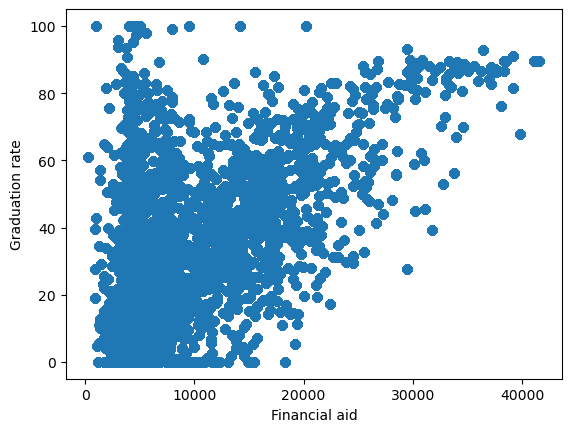

In [44]:
plt.scatter(df.aid_value, df.grad_100_value)
plt.xlabel('Financial aid')
plt.ylabel('Graduation rate')
plt.show()

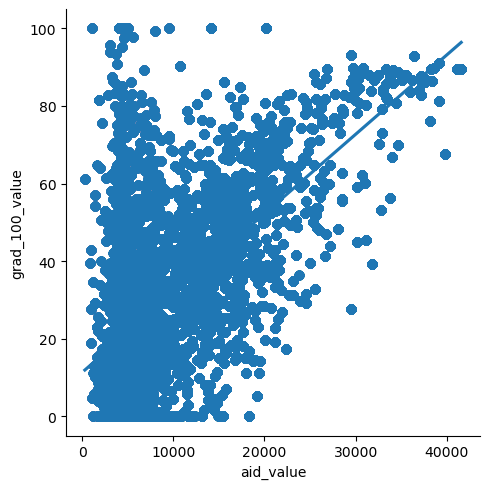

In [45]:
import seaborn as sns
sns.lmplot(x = 'aid_value', y = 'grad_100_value', data = df);

# See if other input variables are linear to our output variables

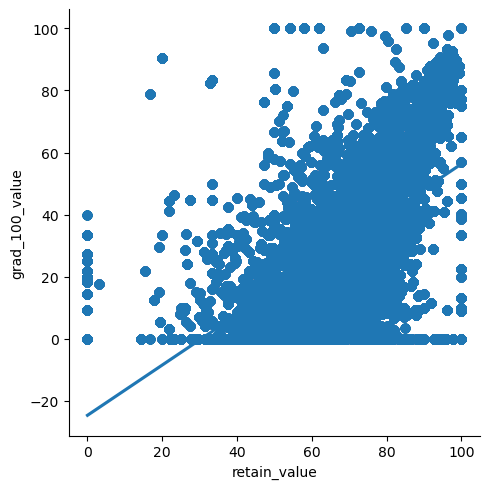

In [46]:
import seaborn as sns
sns.lmplot(x = 'retain_value', y = 'grad_100_value', data = df);

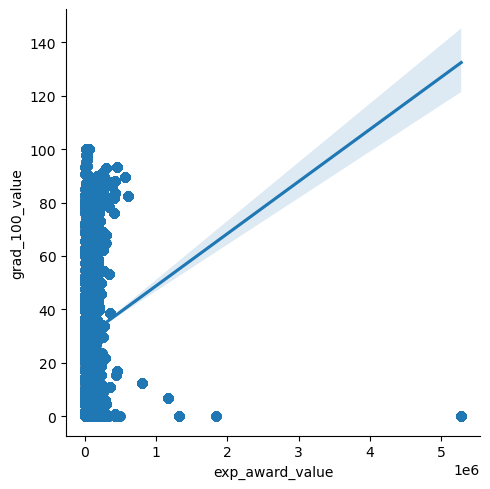

In [47]:
import seaborn as sns
sns.lmplot(x = 'exp_award_value', y = 'grad_100_value', data = df);

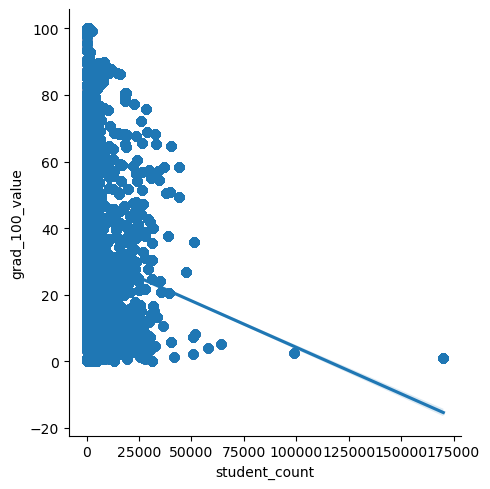

In [48]:
import seaborn as sns
sns.lmplot(x = 'student_count', y = 'grad_100_value', data = df);

### Categorical Data

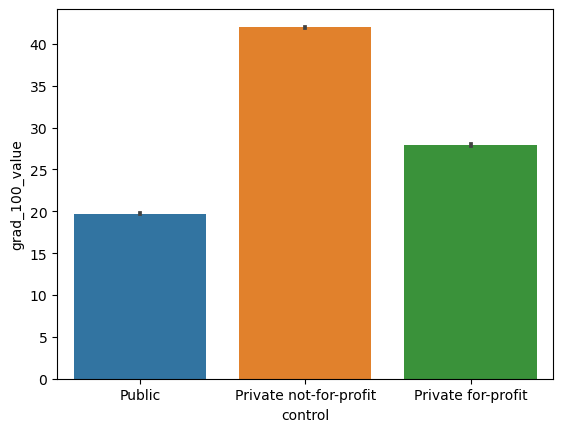

In [49]:
# Plot for the control variable
sns.barplot(data = df, x = 'control', y = 'grad_100_value');

In [50]:
# convert "Control" string to float, otherwise will give error
control_codes = {'Public': 1, 'Private not-for-profit' : 2, 'Private for-profit' : 3}
df['control_codes'] = df.control.map(control_codes)

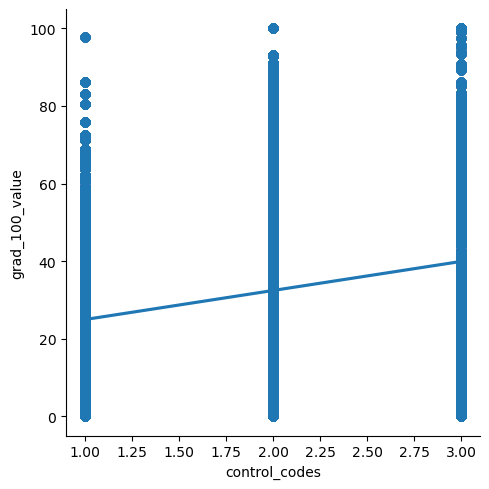

In [51]:
sns.lmplot(x = 'control_codes', y = 'grad_100_value', data = df);

In [53]:
# check the correlation of control with respect to the grad_100_value

df.grad_100_value.corr(df.control_codes)

0.23160968012788685

The correlation is moderate.

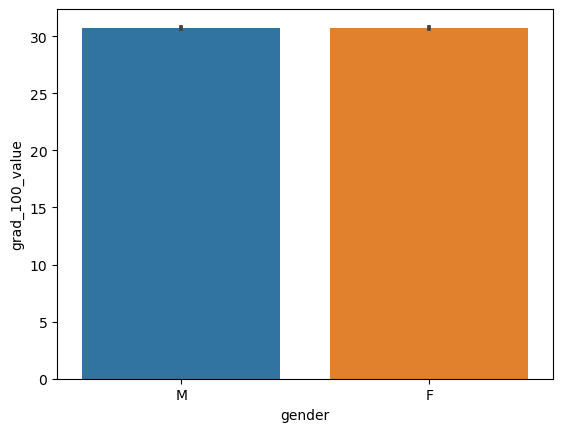

In [54]:
# Plot for the Gender variable
sns.barplot(data = df, x = 'gender', y = 'grad_100_value');

In [55]:
# Convert gender to numerical variables
gender_codes = {'M' : 1, 'F' : 0}
df['gender_codes'] = df.gender.map(gender_codes)

In [56]:
# check the correlation of gender with respect to the grad_100_value

df.grad_100_value.corr(df.gender_codes)

-5.637470554531123e-19

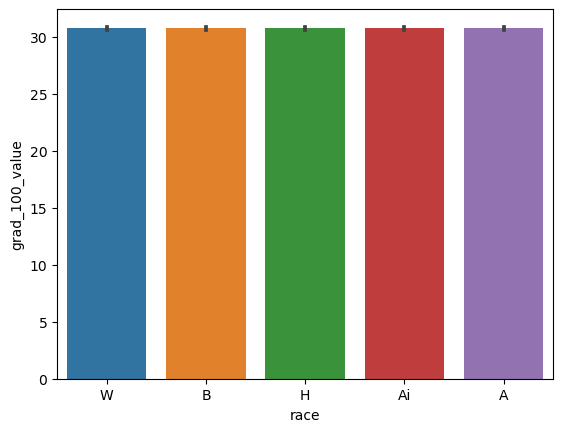

In [57]:
# Plot for the Race variable
sns.barplot(data = df, x = 'race', y = 'grad_100_value');

In [58]:
# Convert gender to numerical variables
race_codes = {'W' : 1, 'B' : 2, 'H': 3, 'Ai' : 4, 'A' : 5}
df['race_codes'] = df.race.map(race_codes)

In [59]:
# check the correlation of race with respect to the grad_100_value

df.grad_100_value.corr(df.race_codes)

1.639346025035597e-18

In [60]:
df.sample(5)

,level,control,gender,race,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size,control_codes,gender_codes,race_codes
258524,4-year,Private for-profit,M,H,108,31.1,32.0,24.6,30201,27738,...,50.0,86.0,32.5,3.0,100.0,91.0,2.0,3,1,3
320565,4-year,Private not-for-profit,F,H,269,11.7,22.8,22.5,42864,108407,...,38.6,20.0,21.7,17.0,25.3,1.0,83.0,2,0,3
537292,4-year,Public,M,B,10404,21.2,20.3,21.5,54710,63710,...,66.9,86.0,26.5,17.0,82.3,76.0,2026.0,1,1,2
432995,4-year,Private not-for-profit,F,H,1694,19.2,22.2,22.5,60127,110403,...,71.5,79.0,22.4,19.0,82.2,71.0,403.0,2,0,3
425920,4-year,Public,M,A,846,24.1,21.3,21.5,0,81610,...,42.5,40.0,48.4,80.0,73.7,49.0,160.0,1,1,5


## Linear Regression Model 

In [61]:
# Drop any null values if any (though our data is cleaned and free from null values)

train_features_scaled = train_features_scaled.dropna()

In [62]:
#train_features_scaled = train_features_scaled.drop(columns = ['index'])
train_features_scaled.columns

print(train_features_scaled.isna().sum().sum())


0


In [63]:
# scale data
train_features_scaled.head()
x_values = train_features_scaled.drop(columns = ['grad_100_value'])
y_value = train_features_scaled.grad_100_value

In [64]:
# Target variable
y_value

0         0.100
1         0.100
2         0.100
3         0.100
4         0.100
          ...  
626095    0.421
626096    0.421
626097    0.421
626098    0.421
626099    0.421
Name: grad_100_value, Length: 626100, dtype: float64

In [65]:
# Make sure to get rid of index column. You dont need index column. it looks like it is just the value of 0 - 3797 but scaled 
# so lets get rid of it 
# x_values = x_values.drop(columns = 'index')

# The explainatory variables
x_values.sample(5)


,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,aid_percentile,...,control_Private for-profit,control_Private not-for-profit,control_Public,gender_F,gender_M,race_A,race_Ai,race_B,race_H,race_W
72586,0.030472,0.124043,0.289242,0.306748,0.010737,0.332997,0.541284,0.48,0.135663,0.46,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
295508,0.029491,0.199081,0.345679,0.368098,0.012250,0.544181,1.000000,0.36,0.322579,0.49,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
290111,0.044180,0.186830,0.322751,0.306748,0.010799,0.361798,0.541284,0.49,0.185438,0.82,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
239655,0.059111,0.148545,0.312169,0.306748,0.010313,0.360942,0.541284,0.43,0.149591,0.60,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
543295,0.000282,0.264165,0.582011,1.000000,0.002295,0.012831,0.000000,0.19,0.126968,0.83,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [66]:
# we need to split the data into a training set and a testing set to see how well this model preforms 
# use train_test_split

In [67]:
#train_x, test_x, train_y, test_y = train_test_split(x_values, y_value)
train_x, test_x, train_y, test_y = train_test_split(x_values, y_value, test_size = 0.2, random_state=42)

In [68]:
train_x

,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,aid_percentile,...,control_Private for-profit,control_Private not-for-profit,control_Public,gender_F,gender_M,race_A,race_Ai,race_B,race_H,race_W
534394,0.005308,0.189127,0.331570,0.368098,0.010277,0.344576,1.000000,0.26,0.308192,0.45,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
509858,0.032959,0.150842,0.283951,0.000000,0.005264,0.102643,0.168790,0.22,0.034709,0.01,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
529050,0.012127,0.148545,0.305115,0.000000,0.005114,0.116902,0.168790,0.21,0.119750,0.85,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
162719,0.009323,0.261103,0.365079,0.368098,0.006318,0.231340,1.000000,0.07,0.244659,0.31,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
100686,0.012450,0.141654,0.326279,0.368098,0.026803,0.547393,1.000000,0.85,0.428596,0.72,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.012379,0.143185,0.326279,0.368098,0.026663,0.547393,1.000000,0.85,0.320254,0.48,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
259178,0.032877,0.120214,0.313933,0.306748,0.012073,0.249332,0.541284,0.61,0.132951,0.43,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
365838,0.071185,0.147779,0.287478,0.306748,0.010796,0.350474,0.541284,0.48,0.131885,0.42,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
131932,0.019468,0.169219,0.370370,0.368098,0.008734,0.493383,1.000000,0.16,0.390181,0.64,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [69]:
x_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626100 entries, 0 to 626099
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   student_count                   626100 non-null  float64
 1   awards_per_value                626100 non-null  float64
 2   awards_per_state_value          626100 non-null  float64
 3   awards_per_natl_value           626100 non-null  float64
 4   exp_award_value                 626100 non-null  float64
 5   exp_award_state_value           626100 non-null  float64
 6   exp_award_natl_value            626100 non-null  float64
 7   exp_award_percentile            626100 non-null  float64
 8   aid_value                       626100 non-null  float64
 9   aid_percentile                  626100 non-null  float64
 10  grad_100_percentile             626100 non-null  float64
 11  grad_150_value                  626100 non-null  float64
 12  grad_150_percent

### Creating, Training and Fitting the Model

In [70]:
# fit your linear regression model
regression = LinearRegression().fit(train_x, train_y)

In [71]:
# Check the performance of the training sets
regression.score(train_x, train_y)

0.9571040627584863

### Model Evaluation

In [72]:
# Now we have cleaned the data and successfully fitted the data in our Model
# Now predicting the test data

y_test_pred = regression.predict(test_x)

import sklearn.metrics as sm


print("Mean absolute error =", round(sm.mean_absolute_error(test_y, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test_y, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test_y, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test_y, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(test_y, y_test_pred), 2))

print("Score of Our Linear Regression Model is : ",regression.score(x_values,y_value)*100)

print(f"\n\nDescription: \n\nNow our data is working accuratly and giving {round(regression.score(x_values,y_value)*100,2)} percent accurate result and \n\nModel Accuracy which is measured by R2 score is also approx {round(sm.r2_score(test_y, y_test_pred),2)} percent which is best")

Mean absolute error = 0.03
Mean squared error = 0.0
Median absolute error = 0.03
Explain variance score = 0.96
R2 score = 0.96
Score of Our Linear Regression Model is :  95.70654001350616


Description: 

Now our data is working accuratly and giving 95.71 percent accurate result and 

Model Accuracy which is measured by R2 score is also approx 0.96 percent which is best


### Additional metric

#### - Root Mean Squared Error (RMSE)

In [73]:
# Calculate RMSE
rmse = sm.mean_squared_error(test_y, y_test_pred, squared=False)
print("Root Mean Squared Error (RMSE) = ", round(rmse, 2))

Root Mean Squared Error (RMSE) =  0.05


### Model Performance

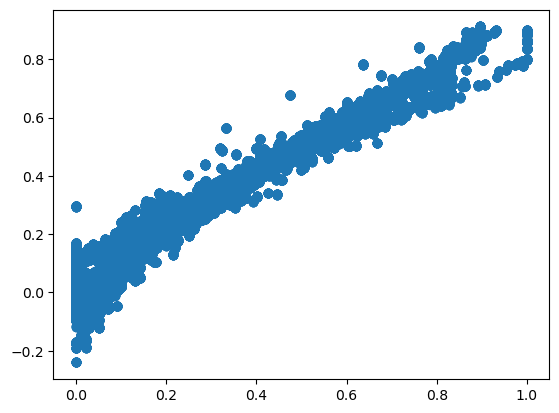

In [74]:
# Checking how well our model performs
plt.scatter(test_y, y_test_pred);

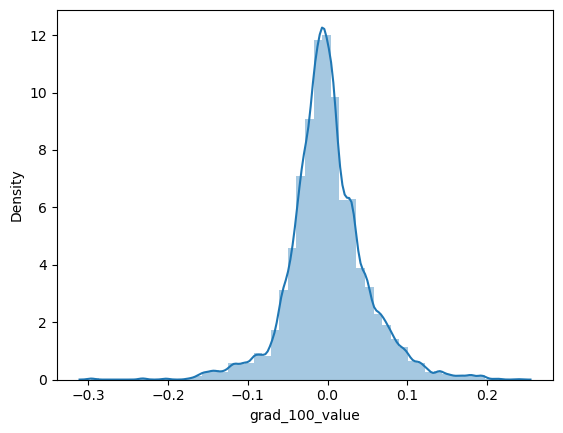

In [75]:
# Residual Histogram 

sns.distplot((test_y-y_test_pred),bins=50);

From the two plots above, our model perform very well on the test dataset.

### Feature Importance
Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

In [76]:
# Define the regression coefficient
weights = regression.coef_

In [77]:
# create a dataframe to view the weight assigned to each column.

weights_df = pd.DataFrame({
    'columns': train_x.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [78]:
weights_df

,columns,weight
26,race_Ai,2.718156e+10
29,race_W,2.718156e+10
27,race_B,2.718156e+10
28,race_H,2.718156e+10
25,race_A,2.718156e+10
11,grad_150_value,8.007619e-01
10,grad_100_percentile,5.952518e-01
0,student_count,1.136953e-01
8,aid_value,1.056083e-01
4,exp_award_value,8.316023e-02


From the above, we can see that though race and gender does not have much significant in improving the model but the task requires us to use them. The feature grad_150_value has the highest coefficient and it good in predicting the grad_100_value. Let's exclude the last 5 features from the model and check how well the model performs.

In [79]:
# Columns to exclude 
columns = ['awards_per_state_value', 'retain_value', 'control_Public',
           'exp_award_natl_value', 'grad_150_percentile'
]

In [80]:
#train_x, test_x, train_y, test_y = train_test_split(x_values, y_value)
#train_x, test_x, train_y, test_y = train_test_split(x_values, y_value, test_size = 0.2, random_state=42)
x2_values = x_values.drop(columns, axis = 1)

In [81]:
x2_values.head()

,student_count,awards_per_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_percentile,aid_value,aid_percentile,grad_100_percentile,grad_150_value,...,level_4-year,control_Private for-profit,control_Private not-for-profit,gender_F,gender_M,race_A,race_Ai,race_B,race_H,race_W
0,0.023677,0.1049,0.306748,0.019941,0.359141,0.9,0.165867,0.72,0.15,0.291,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.023677,0.1049,0.306748,0.019941,0.359141,0.9,0.165867,0.72,0.15,0.291,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.023677,0.1049,0.306748,0.019941,0.359141,0.9,0.165867,0.72,0.15,0.291,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.023677,0.1049,0.306748,0.019941,0.359141,0.9,0.165867,0.72,0.15,0.291,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.023677,0.1049,0.306748,0.019941,0.359141,0.9,0.165867,0.72,0.15,0.291,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [82]:
#train_x, test_x, train_y, test_y = train_test_split(x2_values, y_value)
train_x, test_x, train_y, test_y = train_test_split(x2_values, y_value, test_size = 0.2, random_state=42)

In [83]:
# fit your linear regression model
regression2 = LinearRegression().fit(train_x, train_y)

In [84]:
# Check the performance of the training sets
regression2.score(train_x, train_y)

0.9281514572932307

Observation: Removing those 5 features decreases the accuracy of our model, this shows that they have a significant impact in the model. 

### Test For Other Algorithm To Improve Performance

#### - Decision Tree Algorithm

In [85]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [86]:
# Create the decision tree model and fit the model on the training data
d_tree = DecisionTreeRegressor(max_depth=5).fit(train_x, train_y)

In [87]:
# Check the performance of the training sets
d_tree.score(train_x, train_y)

0.9612720434238822

In [88]:
# Make predictions on the test data
y_test_pred1 = d_tree.predict(test_x)

In [89]:
# Check the model performance

print("Decision Tree Mean absolute error =", round(sm.mean_absolute_error(test_y, y_test_pred1), 2)) 
print("Decision Tree Mean squared error =", round(sm.mean_squared_error(test_y, y_test_pred1), 2)) 
print("Decision Tree Median absolute error =", round(sm.median_absolute_error(test_y, y_test_pred1), 2)) 
print("Decision Tree Explain variance score =", round(sm.explained_variance_score(test_y, y_test_pred1), 2)) 
print("Decision Tree R2 score =", round(sm.r2_score(test_y, y_test_pred1), 2))
print("Decision Tree Root Mean Squared Error (RMSE) = ", round(sm.mean_squared_error(test_y, y_test_pred1, squared=False), 2))

Decision Tree Mean absolute error = 0.03
Decision Tree Mean squared error = 0.0
Decision Tree Median absolute error = 0.03
Decision Tree Explain variance score = 0.96
Decision Tree R2 score = 0.96
Decision Tree Root Mean Squared Error (RMSE) =  0.05


From above, our decision tree model performs better than the linear regression model.

#### - Random Forest Regression Model

In [90]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit the model
r_forest = RandomForestRegressor(n_estimators=100, max_depth=5).fit(train_x, train_y)

In [91]:
# Check the performance of the training sets
r_forest.score(train_x, train_y)

0.9671671782474679

In [92]:
# Make predictions on the test data
y_test_pred2 = r_forest.predict(test_x)

In [93]:
# Check the model performance

print("Decision Tree Mean absolute error =", round(sm.mean_absolute_error(test_y, y_test_pred2), 2)) 
print("Decision Tree Mean squared error =", round(sm.mean_squared_error(test_y, y_test_pred2), 2)) 
print("Decision Tree Median absolute error =", round(sm.median_absolute_error(test_y, y_test_pred2), 2)) 
print("Decision Tree Explain variance score =", round(sm.explained_variance_score(test_y, y_test_pred2), 2)) 
print("Decision Tree R2 score =", round(sm.r2_score(test_y, y_test_pred2), 2))
print("Decision Tree Root Mean Squared Error (RMSE) = ", round(sm.mean_squared_error(test_y, y_test_pred2, squared=False), 2))

Decision Tree Mean absolute error = 0.03
Decision Tree Mean squared error = 0.0
Decision Tree Median absolute error = 0.02
Decision Tree Explain variance score = 0.97
Decision Tree R2 score = 0.97
Decision Tree Root Mean Squared Error (RMSE) =  0.04


Finally, using Random Forest and Decision tree have a better performance than the linear regression model. 